--------------------------
#### visualize how KNN works
-------------------

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import NearestNeighbors  # this is not a classifier

In [36]:
X = np.random.rand(40, 2)
y = np.random.choice([0, 1], size=40)

In [37]:
#X, y

Text(0.5, 1.0, 'Data Points')

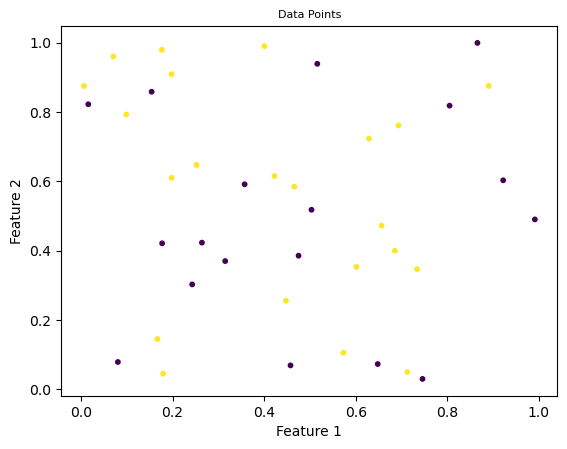

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
# Set plot labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points', fontsize=8)

In [39]:
k = 5    # number of neighbors

nbrs = NearestNeighbors(n_neighbors=k).fit(X)

In [40]:
query_point = np.array([[0.4, 0.6]])  # Example query point

In [41]:
nbrs.kneighbors(query_point)

(array([[0.02701308, 0.04358276, 0.0674319 , 0.13194624, 0.15519897]]),
 array([[15, 27, 18, 30, 22]], dtype=int64))

In [42]:
X

array([[0.92189256, 0.60282146],
       [0.4750053 , 0.38550277],
       [0.5159389 , 0.93865924],
       [0.60140379, 0.35309146],
       [0.6479713 , 0.0731224 ],
       [0.4002897 , 0.98956006],
       [0.86565629, 0.99888101],
       [0.16661214, 0.14518578],
       [0.17912547, 0.04534466],
       [0.15418649, 0.85810864],
       [0.71247443, 0.05027953],
       [0.08047791, 0.07904107],
       [0.5727985 , 0.1057237 ],
       [0.07053691, 0.95952916],
       [0.19774217, 0.90875799],
       [0.4224287 , 0.61505523],
       [0.44747833, 0.25572084],
       [0.00632655, 0.87472336],
       [0.46559112, 0.58435182],
       [0.65639645, 0.47214455],
       [0.69328096, 0.76101915],
       [0.80481961, 0.81800478],
       [0.25215681, 0.64721348],
       [0.99107441, 0.4901121 ],
       [0.26401275, 0.42314248],
       [0.01581581, 0.82199141],
       [0.74573932, 0.03023449],
       [0.35727596, 0.59139109],
       [0.17655981, 0.97920113],
       [0.89038517, 0.87504557],
       [0.

In [43]:
distances, indices = nbrs.kneighbors(query_point)

In [44]:
distances

array([[0.02701308, 0.04358276, 0.0674319 , 0.13194624, 0.15519897]])

In [45]:
distances[0]

array([0.02701308, 0.04358276, 0.0674319 , 0.13194624, 0.15519897])

In [46]:
distances[0][-1]

0.155198974634716

In [47]:
radius = distances[0][-1]

In [48]:
indices

array([[15, 27, 18, 30, 22]], dtype=int64)

In [49]:
y

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [50]:
nearest_neighbor_labels = y[indices]

In [51]:
# Perform a simple "voting" for the prediction
prediction = np.bincount(nearest_neighbor_labels.flatten()).argmax()

print(f"Predicted label for the query point: {prediction}")

Predicted label for the query point: 1


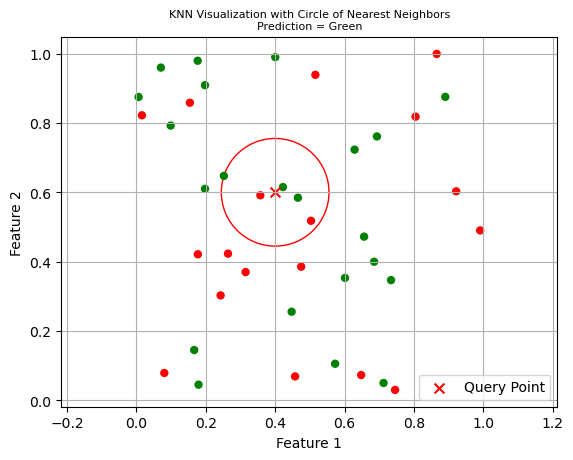

In [53]:
# Plot a circle with the query point as the center
circle = plt.Circle(query_point[0], 
                    radius, 
                    color='red', 
                    fill=False)
plt.gca().add_patch(circle)

# Highlight the query point
# Create a scatter plot of the data points

# Create a colormap with distinct colors for each class
cmap = ListedColormap(['r', 'g'])  # Red, Green

colors = {0: 'Red', 1: 'Green'}

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=25)

plt.scatter(query_point[:, 0], 
            query_point[:, 1], 
            color='red', 
            marker='x', 
            s=50, 
            label='Query Point')

# Annotate each data point
# for i, (x_val, y_val) in enumerate(X):
#     plt.annotate(text      = f'{x_val:.2f}, {y_val:.2f}', 
#                  xy        = (x_val, y_val), 
#                  textcoords= "offset points", 
#                  xytext    = (0,5), 
#                  ha        = 'center', 
#                  fontsize  = 4, 
#                  alpha     = .5,
#                  color     = 'black')

# Set plot labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Visualization with Circle of Nearest Neighbors\nPrediction = {}'.format(colors[prediction]), fontsize=8)
plt.legend(loc='lower right')

# Show the plot
plt.axis('equal')  # Equal aspect ratio for better visualization
plt.grid()